In [19]:
import progressbar
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rebound

In [25]:
sim = rebound.SimulationArchive("ogi_archive.bin")

In [26]:
n_iter = len(sim)

times = np.zeros(n_iter)
x = np.zeros((3,n_iter))
y = np.zeros((3,n_iter))
z = np.zeros((3,n_iter))
a = np.zeros(n_iter)
e = np.zeros(n_iter)

for i in progressbar.progressbar(range(n_iter)):
    ps = sim[i].particles
    times[i] = sim[i].t
    x[0][i] = ps[0].x
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z

    x[1][i] = ps[1].x
    y[1][i] = ps[1].y
    z[1][i] = ps[1].z
    a[i] = ps[1].a
    e[i] = ps[1].e

    x[2][i] = ps[2].x
    y[2][i] = ps[2].y
    z[2][i] = ps[2].z

100% (100000 of 100000) |################| Elapsed Time: 0:00:10 Time:  0:00:10


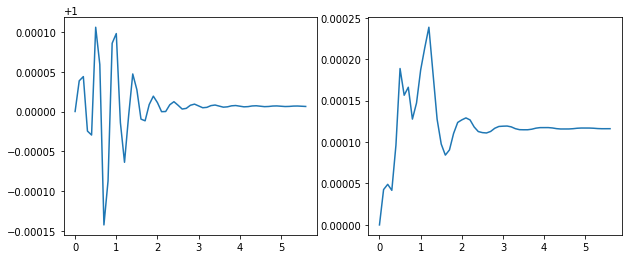

In [27]:
%matplotlib inline

fig = plt.figure(figsize=(10,4))
axs = fig.subplots(1,2)
axs[0].plot(times,a)
axs[1].plot(times,e)
plt.show()

In [28]:
def draw_sphere(ax, radius):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.25)

<IPython.core.display.Javascript object>


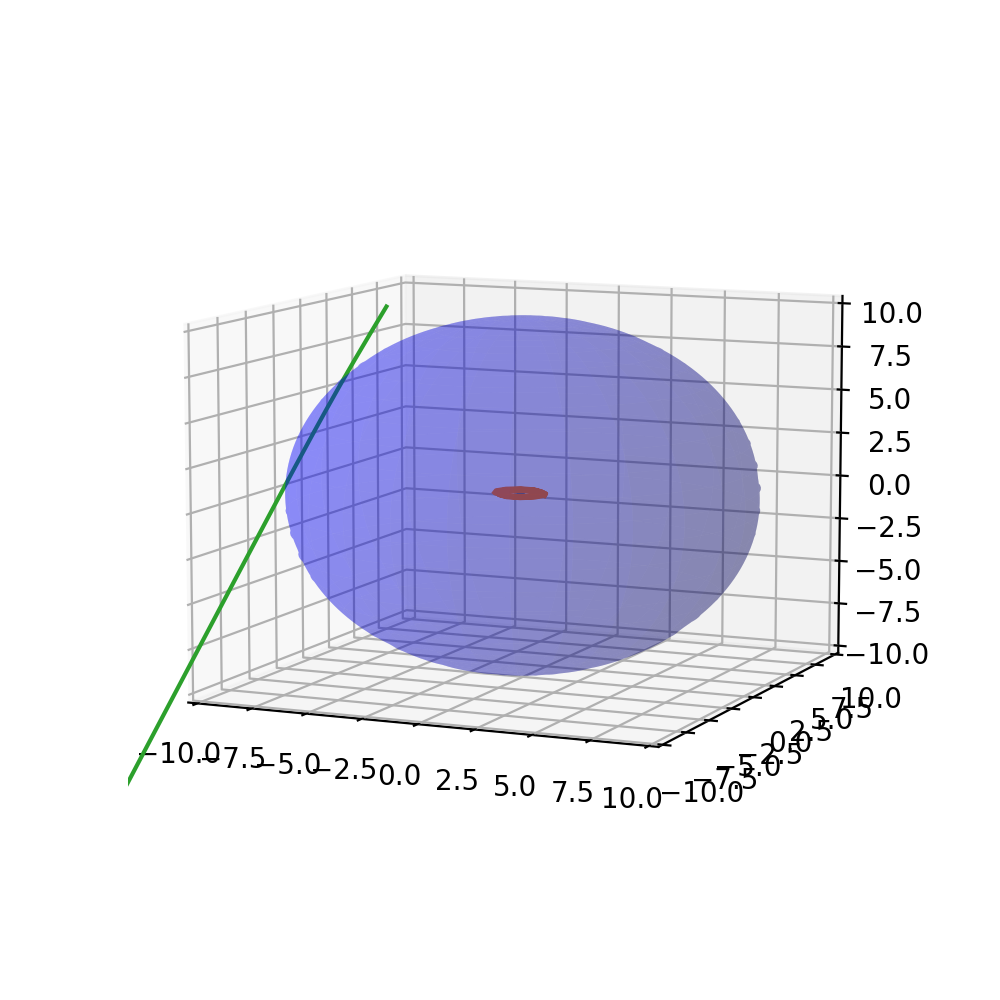

In [31]:
%matplotlib notebook

closest_approach = 10
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

draw_sphere(ax,closest_approach)
ax.plot(x[0], y[0], z[0])
ax.plot(x[1], y[1], z[1])
ax.plot(x[2], y[2], z[2])
ax.set_xlim(-closest_approach,closest_approach)
ax.set_ylim(-closest_approach,closest_approach)
ax.set_zlim(-closest_approach,closest_approach)

plt.show()